# Scikit-Image 

Aquest tutorial serveix com a **Introducció al processament d'imatges amb Python**. Hi ha diverses biblioteques de processament d'imatges a l'ecosistema Python. Alguns dels més populars inclouen OpenCV (Open Source Computer Vision), Scikit-Image i PIL (Python Imaging Library).

---

**Scikit-Image** (en breu skimage) és una biblioteca d'imatges impulsada per la comunitat construïda sobre scipy.ndimage i proporciona diferents funcions per a diverses tasques de processament d'imatges a Python.

# Importing skimage

skimage is available by default in Colab notebooks. Therefore the library can be invoked directly using the *import* statement

*PS: Follow the instructions on the [Installation section](https://scikit-image.org/docs/stable/install.html) of Scikit-Image to make local installations.*


In [5]:
import skimage
import numpy as np
print(skimage.__version__)

0.22.0


# Submòduls comuns

La majoria de les rutines (funcions) s'agrupen sota els diferents submòduls de skimage.

Les imatges de prova estàndard formen part del submòdul **data**. Es pot accedir directament a aquestes imatges mitjançant trucades de funció.

In [1]:
from skimage import data
camera_image = data.camera()

# Què és una imatge?

La imatge no és més que una **matriu n-dimensional** de nombres. Cada element de la matriu correspon a un **píxel**. La fila (r) i la columna (c) corresponen a la **mida de la imatge** i cada pla r x c correspon a un **canal d'imatge**.

La majoria d'imatges s'utilitzen com a:

* **Imatges en escala de grisos:** Imatge 2D (r x c) on cada píxel correspon a la intensitat.
* **Imatges en color (Imatges RGB):** Imatges 2D multicanal on els canals corresponen als canals vermell, verd i blau.

# Propietats de la imatge

Com s'ha esmentat anteriorment, les imatges s'emmagatzemen com a matrius numpy a skimage. Totes les operacions numpy possibles són possibles a les dades de la imatge.

**Exercici #01:**

* Imprimeix el tipus d'imatge de mostra carregada anteriorment
* Imprimeix la forma i la mida de la imatge
* Imprimeix el nombre de canals de la imatge carregada


In [7]:
# solution
print(camera_image.dtype)
print(camera_image.shape)
print(camera_image.ndim)

uint8
(512, 512)
2


# Visualització d'imatges
La visualització d'imatges manipulades és una part d'importació de qualsevol eina de processament d'imatges. skimage proporciona una visualització clau a través de diferents eines disponibles a l'ecosistema Python.

Per a tots els experiments d'aquest curs, utilitzaríem les funcions proporcionades per la biblioteca **Matplotlib**.

LLegiu el  **[usage](https://matplotlib.org/stable/tutorials/introductory/usage.html)** per obtenir una introducció a les diferents funcions de matplotlib.

Familiaritzeu-vos amb els plots, subplots, la configuració de títols, llegendes, etiquetes, etc. Mireu també els gràfics comuns que es poden utilitzar per entendre diferents problemes.

In [3]:
import matplotlib.pyplot as plt

Les imatges es visualitzen mitjançant la funció **imshow** disponible al submòdul pyplot.

**Exercici #02:**

* Visualitza la imatge de la càmera amb **imshow**
* Canvia el títol de l'eix del plot com a "càmera"



Text(0.5, 1.0, 'Camera')

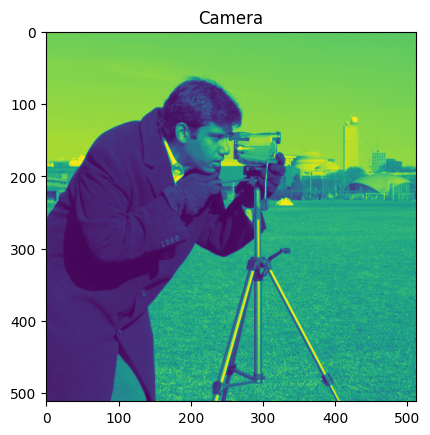

In [13]:
# solution
plt.imshow(camera_image)
plt.title("Camera")

**Exercici #03:**


* Entendre els paràmetres d'imshow de pyplot
* Visualitza la imatge carregada com a imatge en escala de grisos



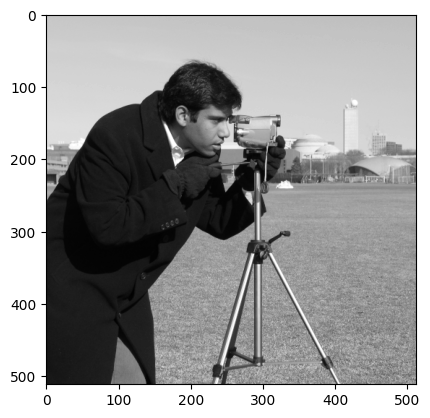

In [14]:
# solution
plt.imshow(camera_image,cmap='gray')

In [18]:
%ls

 El volumen de la unidad C es Windows
 El n�mero de serie del volumen es: EA56-A15A

 Directorio de c:\Users\rmate\Documents\GitHub\CE-IA-i-Big-Data-Vedruna\MIA

14/02/2024  20:03    <DIR>          .
14/02/2024  16:52    <DIR>          ..
14/02/2024  20:03            13.400 il_570xN.5600518378_5opm.jpeg
14/02/2024  16:52         6.284.572 Introducci� als models d'intel�lig�ncia artificial.pptx
14/02/2024  16:52            18.416 introduccio_numpy.ipynb
14/02/2024  17:16            19.155 introduccio_skimage.ipynb
               4 archivos      6.335.543 bytes
               2 dirs  427.366.473.728 bytes libres


# Llegint i ensenyant imatges

It is also possible to load images from external sources and also save the manipulated images in different formats. All the supported functions are available in the **io** submodule. 

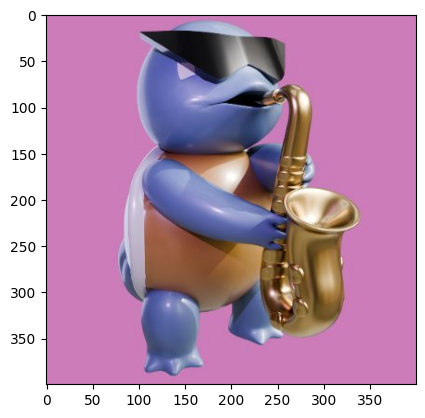

In [32]:
from skimage import io
test_image = io.imread('C:\\Users\\rmate\Documents\\GitHub\\CE-IA-i-Big-Data-Vedruna\\MIA\\test.jpeg') # el path de la vostre imatge
plt.imshow(test_image)

De la mateixa manera, les imatges es poden desar en diferents formats mitjançant la funció imsave.

**Exercici #04:**

* Creeu una matriu numpy de mida 256 x 256 x 3 que mantindrà tot el color **blanc** en tots els píxels i un altre amb tots els pixels en color **negre**
* Deseu la matriu creada com a imatge jpg a la carpeta d'imatges mitjançant la funció **imsave**.

***Pista**: Reviseu la funció np.full de numpy per veure el que fa*


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


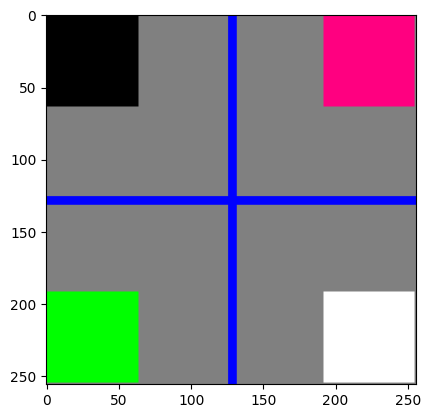

In [46]:
# solution
img_zeros = np.zeros((256,256,3))
img_white = np.full((256,256,3), 128)
img_white[:64, :64] = 0
img_white[-64:-1, -64:-1] = 256
img_white[:64,-64:-1] = [256,0,128]
img_white[-64:-1, :64] = [0,256,0]
img_white[:, 126:132] = [0,0,256]
img_white[126:132, :] = [0,0,256]
plt.imshow(img_white)

# Coordenades de la imatge
Les imatges en escala de grisos s'indexen com a **r** x **c** on (0,0) correspon a la cantonada superior esquerra de la imatge. Tingueu en compte que això és diferent de les coordenades cartesianes normals (x,y).

Llegiu la documentació del **[](https://scikit-image.org/docs/dev/user_guide/numpy_images.html)** per obtenir informació completa sobre les manipulacions estàndard d'imatges.

# Transformació d'imatge

Hi ha diverses utilitats de manipulació d'imatges, com ara conversions de tipus disponibles al submòdul **utils**. Un altre submòdul comú és el submòdul **transform**. Les funcions disponibles al submòdul de transformació s'utilitzen per canviar la resolució espacial i fotomètrica d'una imatge en diversos escenaris.

Les transformacions que s'utilitzen habitualment són canviar la mida de les imatges i girar-les.


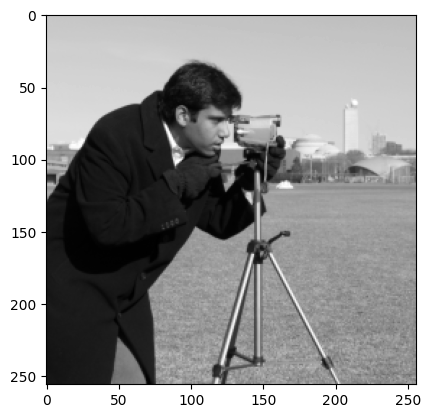

(256, 256) 0.008465512696419247 0.9994933599059728


In [10]:
# Resize the camera image to 256 x 256
from skimage.transform import resize
camera_image_resize = resize(camera_image, (256, 256))
plt.imshow(camera_image_resize, cmap='gray')
plt.show()
print(camera_image_resize.shape, camera_image_resize.min(), camera_image_resize.max()) 

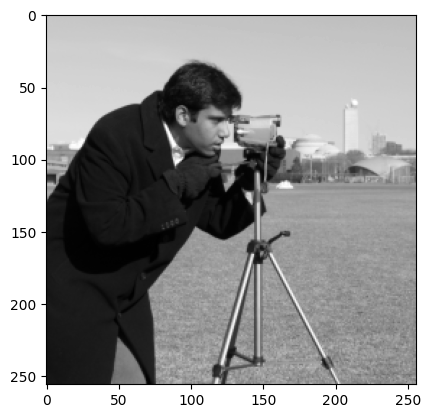

(256, 256) 0.008465512696419247 0.9994933599059728


In [14]:
# Rescale the camera image by a factor of 0.5
from skimage.transform import rescale
camera_image_rescale = rescale(camera_image, 0.5)
plt.imshow(camera_image_rescale, cmap='gray')
plt.show()
print(camera_image_rescale.shape, camera_image_rescale.min(), camera_image_rescale.max())

**Exercici #06:**

* Quina diferència hi ha entre les funcions de **resize** i **rescale**?


**Solution**


poseu aqui la solució

* Redimensioneu la imatge en un factor de 0,5 amb el paràmetre preserve_range activat i observeu la diferència.

In [ ]:
# solution
camera_image_true = rescale(camera_image,0.5, preserve_range=True)
camera_image_false = rescale(camera_image,0.5, preserve_range=False)
print(camera_image_false.min(), camera_image_true.min()) # preserve_range: bool, optional Whether to keep the original range of values. Otherwise, the input image is converted according to the conventions of img_as_float. Also see https://scikit-image.org/docs/dev/user_guide/data_types.html


# Manipulació dels valors d'intensitat
Què passa quan canviem els valors de píxels de la imatge?

Executeu les sortides següents i observeu la diferència.

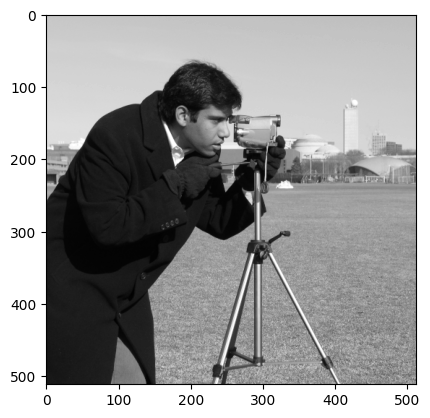

(512, 512) 0 255


In [15]:
plt.imshow(camera_image, cmap='gray')
plt.show()
print(camera_image.shape, camera_image.min(), camera_image.max()) 

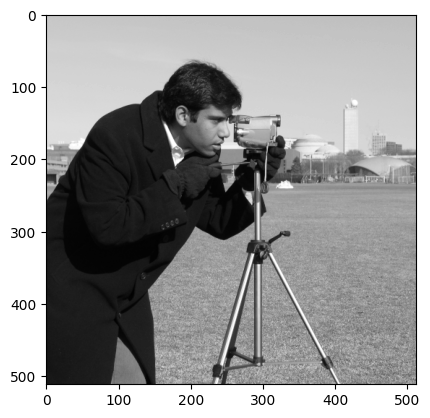

(512, 512) 0.0 127.5


In [16]:
camera_image_2 = camera_image/2  # reducing the intensity by 2
plt.imshow(camera_image_2, cmap='gray')
plt.show()
print(camera_image_2.shape, camera_image_2.min(), camera_image_2.max()) 

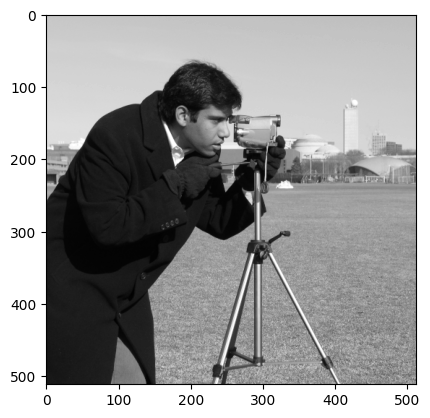

(512, 512) 0.0 63.75


In [17]:
camera_image_3 = camera_image/4  # reducing the intensity by 4
plt.imshow(camera_image_3, cmap='gray')
plt.show()
print(camera_image_3.shape, camera_image_3.min(), camera_image_3.max()) 

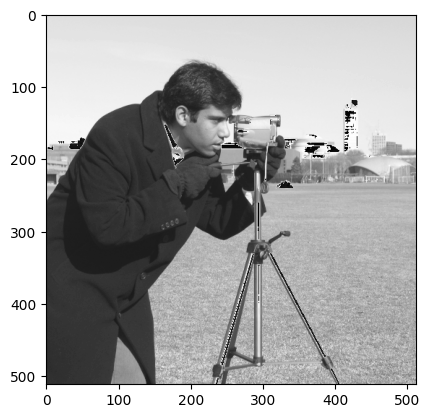

(512, 512) 0 255


In [18]:
camera_image_4 = camera_image + 25  # shifting intensity by +25
plt.imshow(camera_image_4, cmap='gray')
plt.show()
print(camera_image_4.shape, camera_image_4.min(), camera_image_4.max()) 

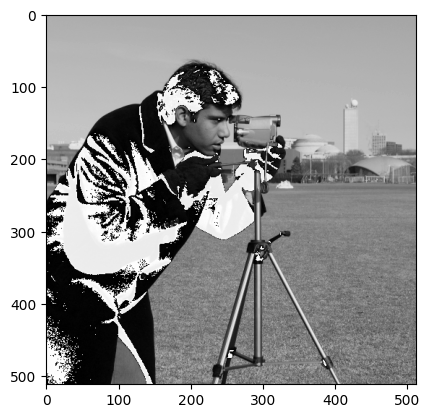

(512, 512) 0 255


In [19]:
camera_image_5 = camera_image - 25  # shifting intensity by -25
plt.imshow(camera_image_5, cmap='gray')
plt.show()
print(camera_image_5.shape, camera_image_5.min(), camera_image_5.max())

**Exercici #07:**

* Quina diferència observeu amb les quatre operacions anteriors? Com afecta el canvi d'intensitat a la imatge?


**Solution**

Escribiu aquí la solució

**Exercici #08:**

* Canvia la mida de la imatge camera_man a (64, 64)
* Mostreu la imatge redimensionada amb matplotlib (a la mateixa escala que la imatge)
* Mostreu la imatge redimensionada amb matplotlib (vegeu la imatge com a 256 x 256)
* Què observes entre els dos plots?


In [ ]:
# solution


# Conversions d'espai de color

Una de les tasques habituals en qualsevol problema de processament d'imatges és convertir imatges d'un espai de color a un altre; la més habitual és convertir imatges en color a escala de grisos, eliminant el canal alfa de la imatge.

*Totes les funcions de l'espai de color estan disponibles al paquet skimage.color*

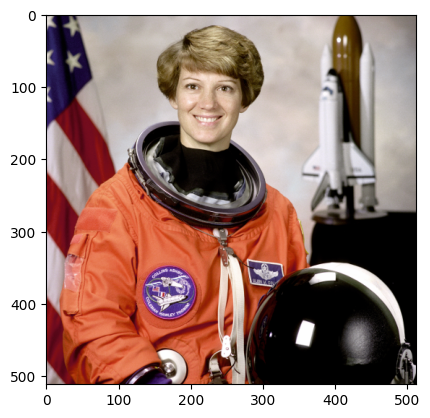

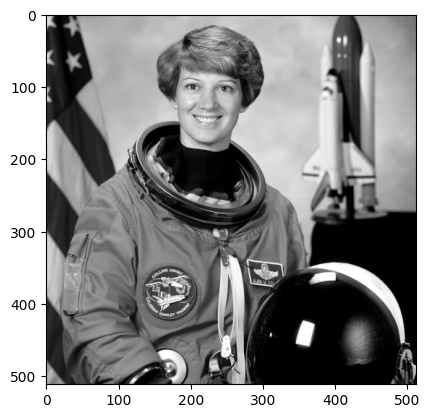

(512, 512)

In [20]:
# converting a rgb image to gray scale

from skimage.color import rgb2gray

img = data.astronaut()
plt.imshow(img)
plt.show()

img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap='gray')
plt.show()
img_gray.shape

(500, 500, 4)


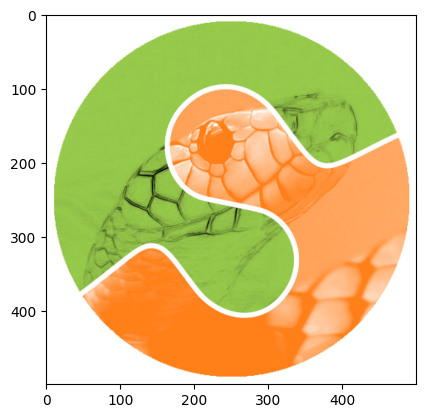

(500, 500, 3)


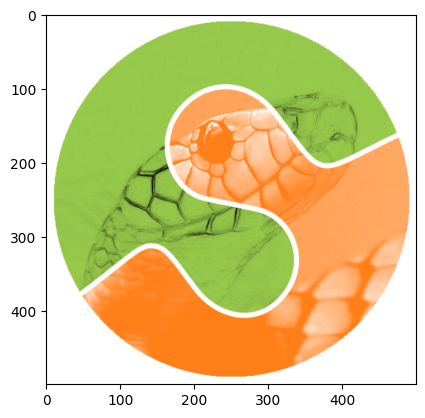

In [21]:
# converting rgba to rgb

from skimage.color import rgba2rgb
# RGBA has 24 bits for RGB color, bit there is an additional 8 bit value for transparency.

img_rgba = data.logo()
print(img_rgba.shape)
plt.imshow(img_rgba)
plt.show()

img_rgb = rgba2rgb(img_rgba)
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

In [22]:
# converting rgb to hsv

from skimage.color import rgb2hsv

# create an array with bright saturated red
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
plt.imshow(red_pixel_rgb)
plt.show()

hsv = rgb2hsv(red_pixel_rgb)
plt.imshow(hsv)
plt.show()

NameError: name 'np' is not defined